This notebook handles model dataloader, finetuning, and inference.
For datacollection, the Is-it-a-bird.py is used

0


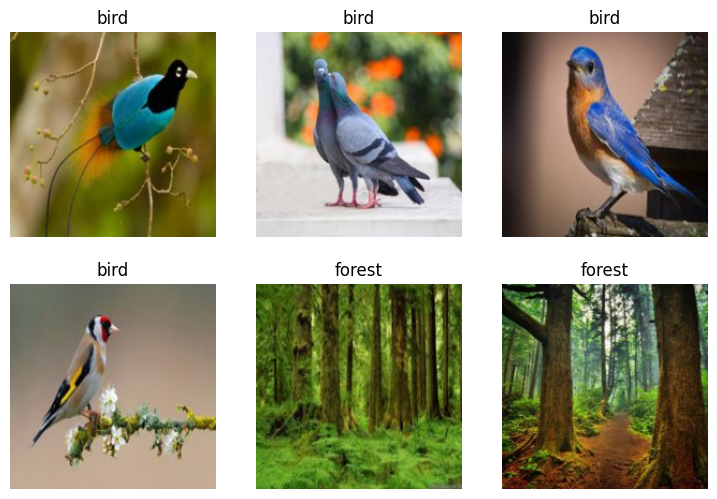

In [9]:

from fastai.vision.all import *

# Dataset path
path = 'dataset'

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
# print(len(failed))

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [10]:
# Finetune the resnet18 model with the dataset
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

d:\Projects\AI\courses\fastai-Practical-Deep-Learning-for-Coders\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Projects\AI\courses\fastai-Practical-Deep-Learning-for-Coders\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.469351,0.060750,0.038961,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.003759,0.000097,0.000000,00:09
1,0.001987,0.000021,0.000000,00:09
2,0.001256,0.000029,0.000000,00:09


In [16]:
# Run inference to check whether a photo is a bird

# Photo1 check
# Bird
is_bird,_,probs = learn.predict(PILImage.create('photo1.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

# Photo2 check
# Forest
is_bird,_,probs = learn.predict(PILImage.create('photo2.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a forest: {probs[1]:.4f}")


# Photo3 check. 
# Photo of owl was not in dataset. There's a forest bg. The model is fooled. It is both a forest and bird.
# But bird probability comes out very low even though the owl is in the foreground
is_bird,_,probs = learn.predict(PILImage.create('photo3.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


This is a: forest.
Probability it's a forest: 1.0000


This is a: forest.
Probability it's a bird: 0.0139
